# S3E24 Initial EDA 

Episode 24 in the Kaggle PS Series of competitions.  In this one, the goal is to predict smoker status given Bio-signals features.   This is a synthetic dataset based on the Smoker Status Prediction using Bio-Signals dataset.   The original dataset is available for download and use.

# Installs

In [1]:
!pip install -q scienceplots

# Imports

In [3]:
import os, glob, pathlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px

import scienceplots
plt.style.use(['science','no-latex'])  # not sure how to set up latex in kaggle yet.

import warnings
warnings.filterwarnings('ignore')

# Read Data

In [4]:
root_dir = '/kaggle/input/playground-series-s3e24'
train = pd.read_csv(root_dir + '/train.csv')
test = pd.read_csv(root_dir + '/test.csv')
ss = pd.read_csv(root_dir + '/sample_submission.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/playground-series-s3e24/train.csv'

# Top Level Statistics

In [4]:
# print all sets - assuming train,test, ss
print(f'Training Data Shape: {train.shape}') 
display(train.head()) 
print(f'Test Data Shape: {test.shape}') 
display(test.head()) 
print(f'Sample Submission Shape: {ss.shape}') 
display(ss.head())

Training Data Shape: (159256, 24)


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


Test Data Shape: (106171, 23)


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


Sample Submission Shape: (106171, 2)


,id,smoking
0,159256,0.5
1,159257,0.5
2,159258,0.5
3,159259,0.5
4,159260,0.5


In [5]:
all_features = [col for col in test.columns if 'id' not in col]
print(f'Length of features: {len(all_features)}')
all_features

Length of features: 21


['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries']

### Takeaway
* Training Data:
    * There are 22 biological features
    * One id col
    * One binary target (smoking)
    * 159k records train
        * good amount of data
* Test Data
    * Same features as test minus target
    * 107k records

In [6]:
train_desc = train.describe().T
test_desc = test.describe().T
delta = train_desc - test_desc
print('_'*34 + ' Training Data ' + '_'*34)
display(train_desc)
print('_'*34 + '  Testing Data  ' + '_'*34)
display(test_desc)
print('_'*34 + '  Stats Delta  ' + '_'*34)
display(delta)


__________________________________ Training Data __________________________________


,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.500000,45973.391572,0.0,39813.75,79627.5,119441.25,159255.0
age,159256.0,44.306626,11.842286,20.0,40.00,40.0,55.00,85.0
height(cm),159256.0,165.266929,8.818970,135.0,160.00,165.0,170.00,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,60.00,65.0,75.00,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,77.00,83.0,89.00,127.0
eyesight(left),159256.0,1.005798,0.402113,0.1,0.80,1.0,1.20,9.9
eyesight(right),159256.0,1.000989,0.392299,0.1,0.80,1.0,1.20,9.9
hearing(left),159256.0,1.023974,0.152969,1.0,1.00,1.0,1.00,2.0
hearing(right),159256.0,1.023421,0.151238,1.0,1.00,1.0,1.00,2.0
systolic,159256.0,122.503648,12.729315,77.0,114.00,121.0,130.00,213.0


__________________________________  Testing Data  __________________________________


,count,mean,std,min,25%,50%,75%,max
id,106171.0,212341.000000,30649.072052,159256.0,185798.5,212341.0,238883.5,265426.0
age,106171.0,44.426538,11.897138,20.0,40.0,40.0,55.0,85.0
height(cm),106171.0,165.221322,8.837065,135.0,160.0,165.0,170.0,190.0
weight(kg),106171.0,67.125618,12.586569,30.0,60.0,65.0,75.0,130.0
waist(cm),106171.0,82.999892,8.946584,51.0,77.0,83.0,89.0,127.7
eyesight(left),106171.0,1.004776,0.397690,0.1,0.8,1.0,1.2,9.9
eyesight(right),106171.0,0.999483,0.385752,0.1,0.8,1.0,1.2,9.9
hearing(left),106171.0,1.024216,0.153719,1.0,1.0,1.0,1.0,2.0
hearing(right),106171.0,1.023980,0.152988,1.0,1.0,1.0,1.0,2.0
systolic,106171.0,122.475403,12.765542,71.0,114.0,121.0,130.0,213.0


__________________________________  Stats Delta  __________________________________


,count,mean,std,min,25%,50%,75%,max
ALT,53085.0,-0.015131,-0.191125,0.0,0.00,0.0,-1.00,0.0
AST,53085.0,-0.042763,-0.039560,0.0,0.00,0.0,0.00,0.0
Cholesterol,53085.0,-0.078227,-0.038454,11.0,0.00,0.0,0.00,24.0
Gtp,53085.0,0.129116,0.276505,0.0,0.00,0.0,0.00,0.0
HDL,53085.0,-0.069602,-0.036411,-9.0,0.00,0.0,0.00,-12.0
LDL,53085.0,0.010278,1.215530,0.0,0.00,0.0,0.00,640.0
Urine protein,53085.0,0.001435,0.007038,0.0,0.00,0.0,0.00,0.0
age,53085.0,-0.119913,-0.054852,0.0,0.00,0.0,0.00,0.0
dental caries,53085.0,0.002537,0.001935,0.0,0.00,0.0,0.00,0.0
eyesight(left),53085.0,0.001022,0.004422,0.0,0.00,0.0,0.00,0.0


### Takeaways
* Test and Train have very close statistics in most cases, so cv scores should represent test data well.

In [7]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   106171 non-null  int64  
 1   age                  106171 non-null  int64  
 2   height(cm)           106171 non-null  int64  
 3   weight(kg)           106171 non-null  int64  
 4   waist(cm)            106171 non-null  float64
 5   eyesight(left)       106171 non-null  float64
 6   eyesight(right)      106171 non-null  float64
 7   hearing(left)        106171 non-null  int64  
 8   hearing(right)       106171 non-null  int64  
 9   systolic             106171 non-null  int64  
 10  relaxation           106171 non-null  int64  
 11  fasting blood sugar  106171 non-null  int64  
 12  Cholesterol          106171 non-null  int64  
 13  triglyceride         106171 non-null  int64  
 14  HDL                  106171 non-null  int64  
 15  LDL              

None

### Takeaways
* No missing values in train or test
* all are integer or float types, no categoricals


In [8]:
int_features = [col for col in test.columns if 'id' not in col and test[col].dtype == 'int']
float_features = [col for col in train.columns if train[col].dtype == 'float']
print(f'Integer Features \n{int_features}')
print(f'Float Features \n{float_features}')
# 16 int cols, 5 float cols

Integer Features 
['age', 'height(cm)', 'weight(kg)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'HDL', 'LDL', 'Urine protein', 'AST', 'ALT', 'Gtp', 'dental caries']
Float Features 
['waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hemoglobin', 'serum creatinine']


## Unique Counts and Value Counts

In [9]:
int_counts,float_counts = [],[]
int_uniq,float_uniq = [],[]

for feat in int_features:
    int_counts.append(train[feat].value_counts())
    int_uniq.append(train[feat].nunique())
for feat in float_features:
    float_counts.append(train[feat].value_counts())
    float_uniq.append(train[feat].nunique())

float_uniq


[531, 20, 17, 134, 28]

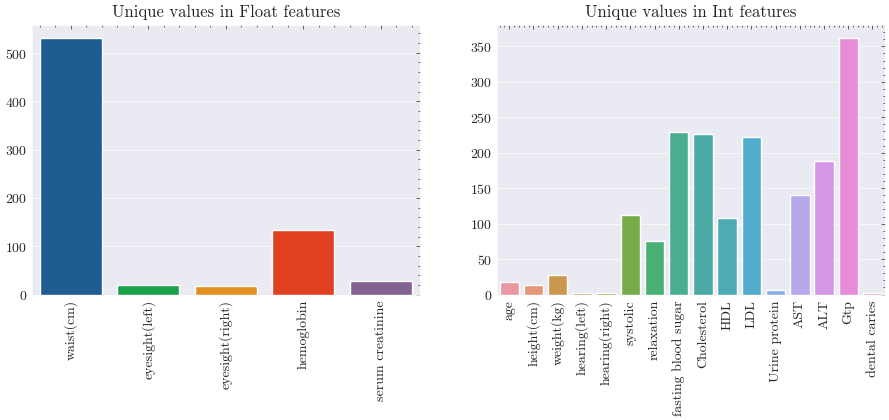

In [10]:
plt.figure(figsize=(11,3.5))
plt.subplot(1,2,1)
sns.barplot(x=float_features,y=float_uniq)
plt.title('Unique values in Float features')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x=int_features,y=int_uniq)
plt.title('Unique values in Int features')
plt.xticks(rotation=90)
plt.show()
    

<Axes: xlabel='eyesight(left)'>

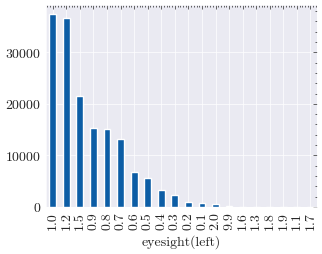

In [11]:
# float counts is a list of pandas Series object which 
float_counts[1].plot(kind='bar')

In [12]:
train['eyesight(left)'].value_counts()
# possible outlier: there is one value at 9.9 which seems out of place (132 values), rest max at 2.0.
# what does this variable mean?

eyesight(left)
1.0    37380
1.2    36618
1.5    21550
0.9    15212
0.8    15078
0.7    13124
0.6     6769
0.5     5599
0.4     3337
0.3     2235
0.2      922
0.1      710
2.0      557
9.9      132
1.6       19
1.3        9
1.8        2
1.9        1
1.1        1
1.7        1
Name: count, dtype: int64

### Takeways
* Float features have a discrete nature, and some ints have very large number of values
* would it be better to convert all to ints?

# Compare to original data

* TBD

# EDA - Feature Distributions

## Integer Features

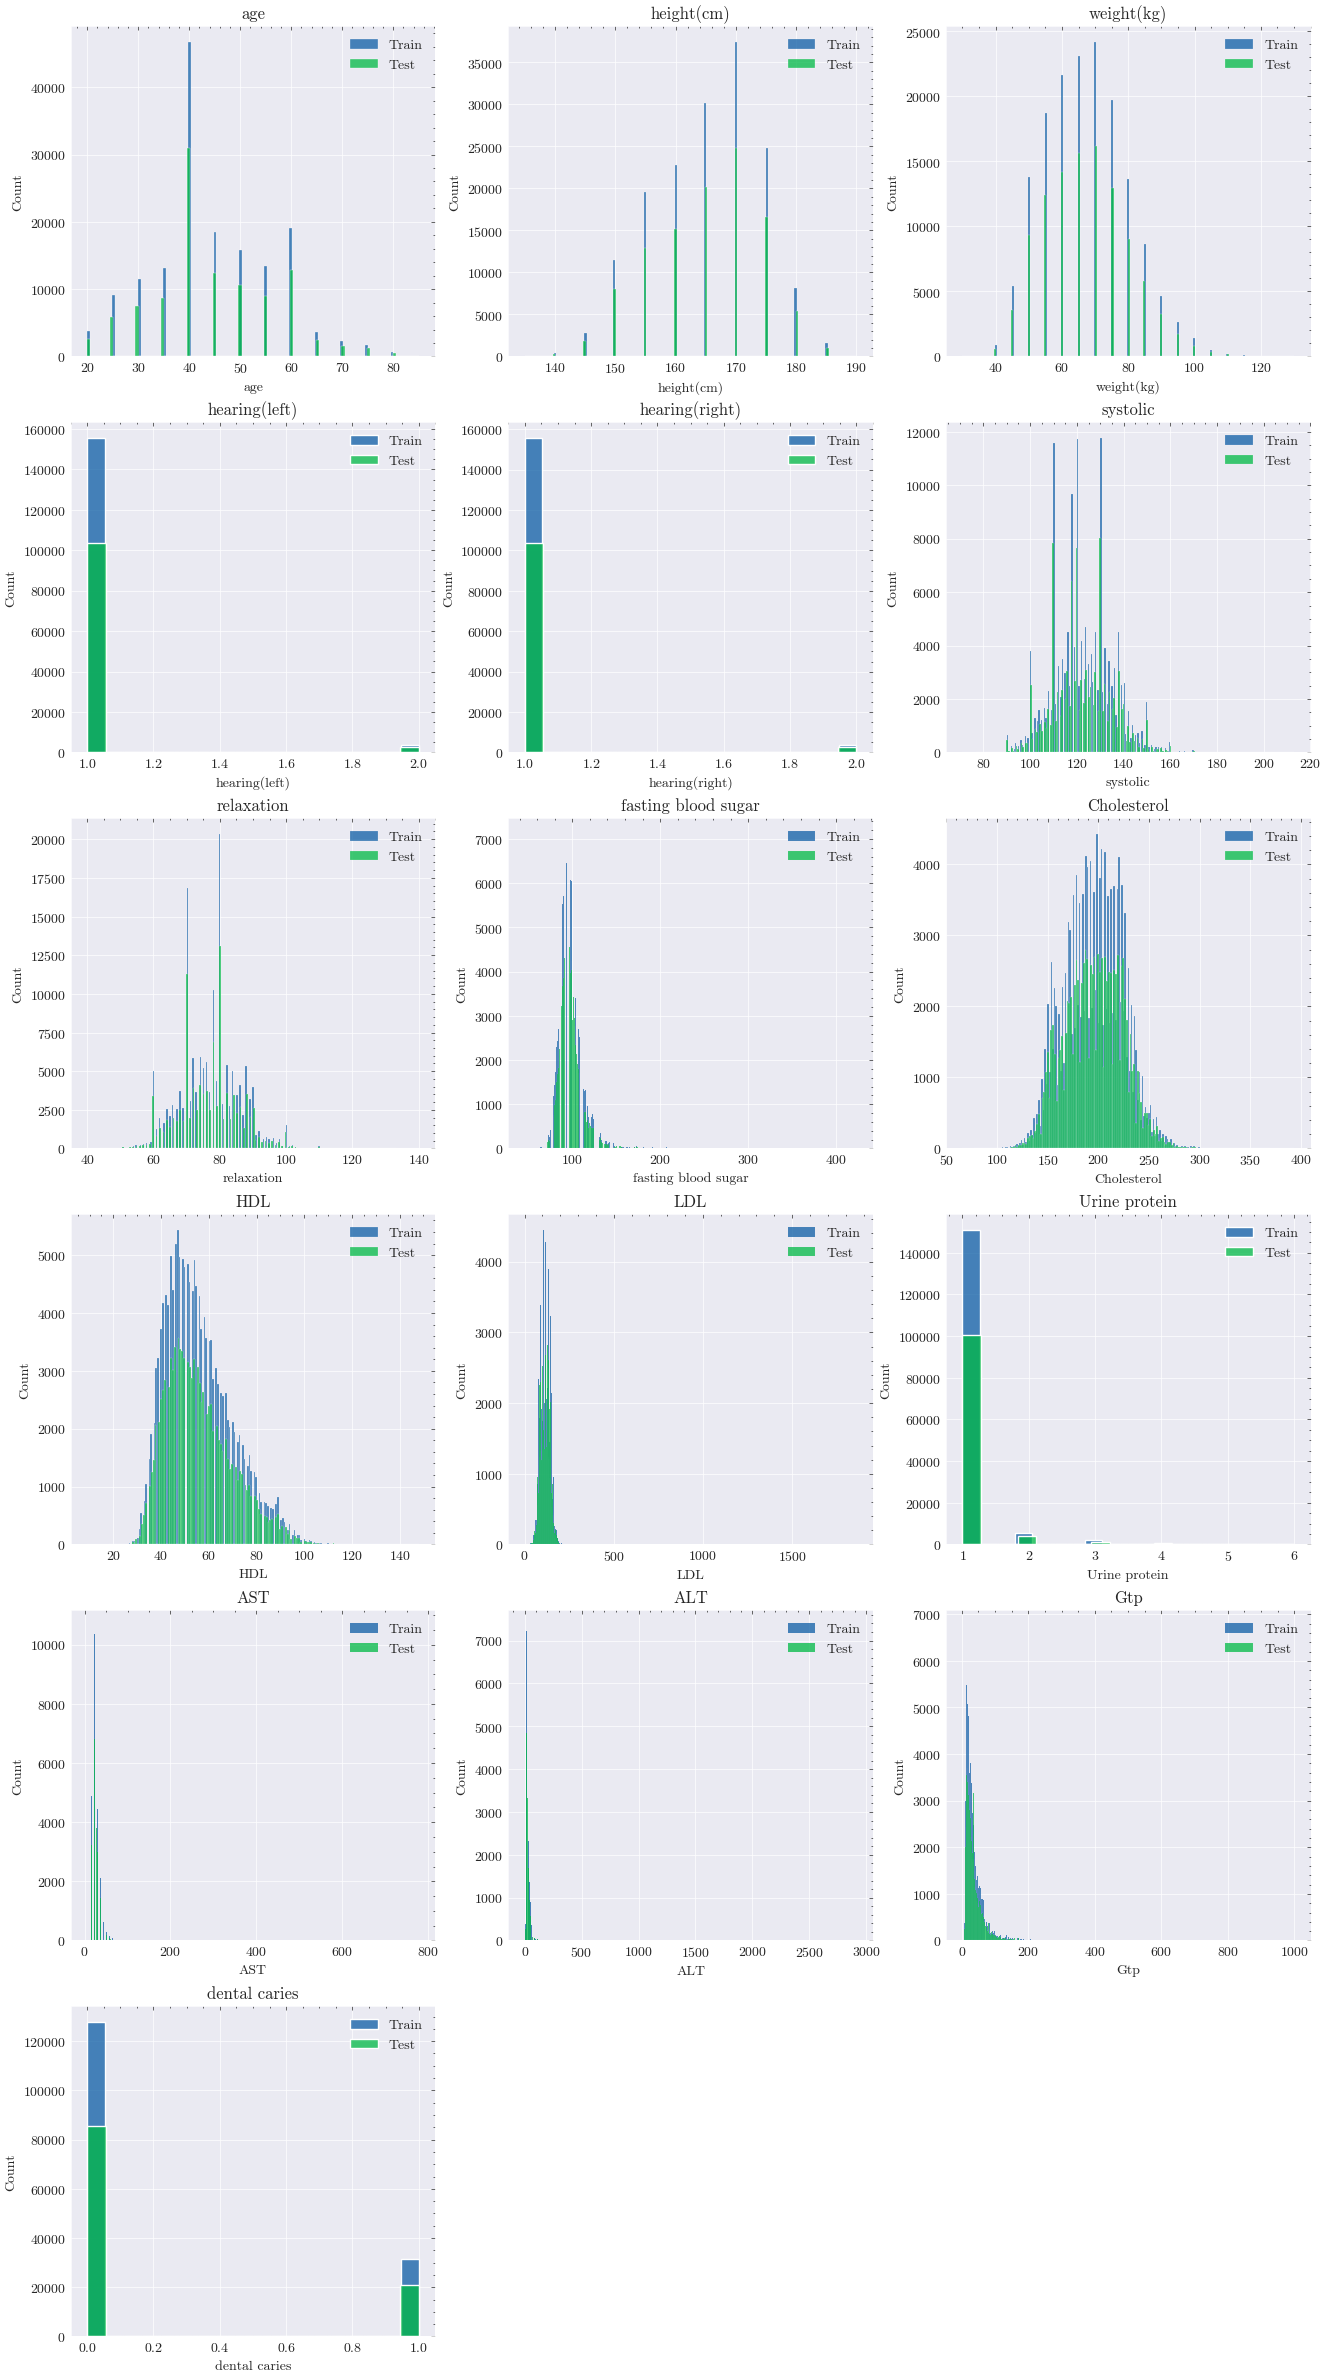

In [13]:
#features = [col for col in train.columns if train[col].dtype=='float']
rows = int(np.ceil(len(int_features)/4)) 
plt.figure(figsize=(16,4*rows)) 
for i,col in enumerate(int_features): 
  plt.subplot(rows,4,i+1) 
  sns.histplot(train[col],kde=False,label='Train') 
  sns.histplot(test[col], kde=False,label='Test')
  plt.legend()
  plt.title(col)

## Float Features

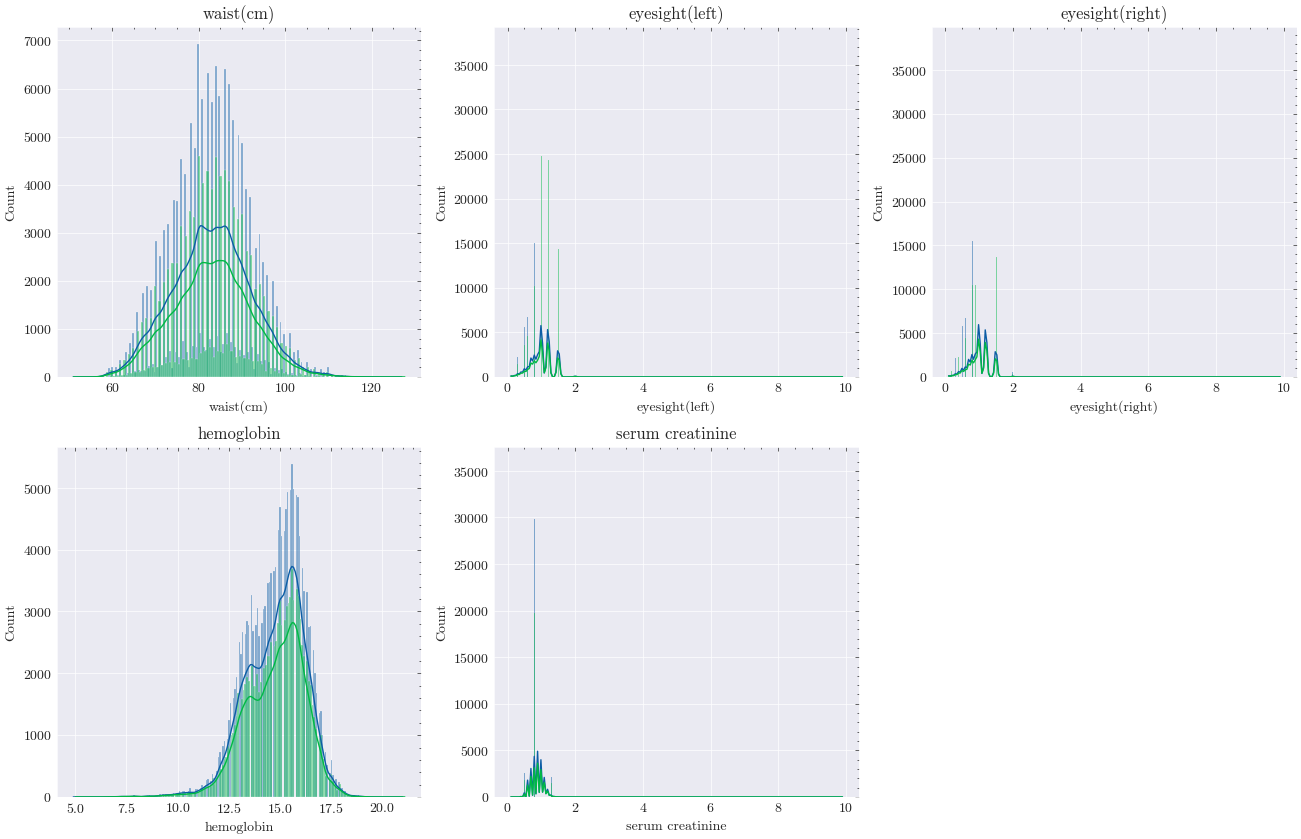

In [14]:
#features = [col for col in train.columns if train[col].dtype=='float']
rows = int(np.ceil(len(float_features)/3)) 
plt.figure(figsize=(16,5*rows)) 
for i,col in enumerate(float_features): 
  plt.subplot(rows,3,i+1) 
  sns.histplot(train[col],kde=True) 
  sns.histplot(test[col], kde=True)
  plt.title(col)

### Takeaways
* Outliers in areas where I wouldn't expect (weight, test resutls, etc).  Needs more investigation

## Individual Feature distributions with boxplots

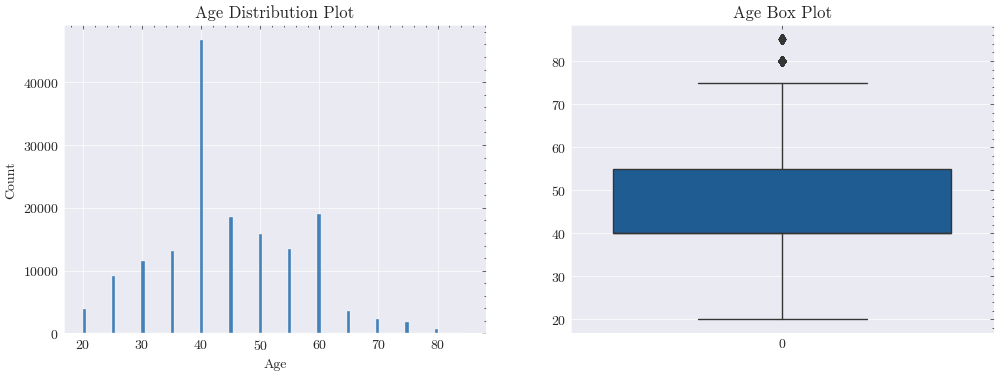

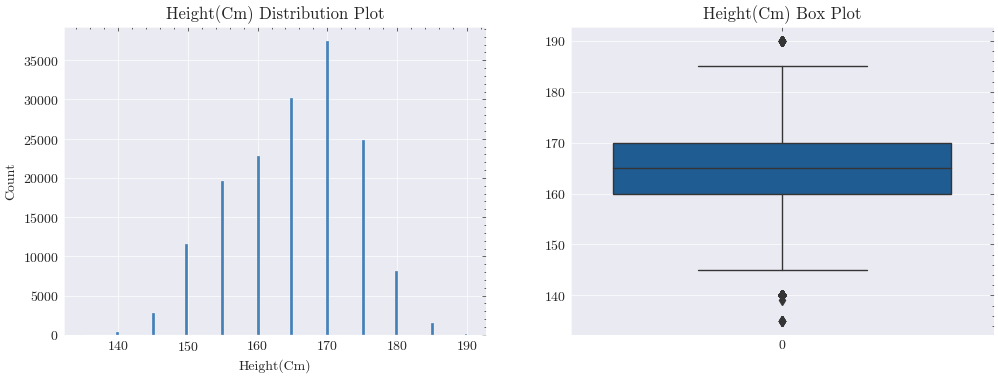

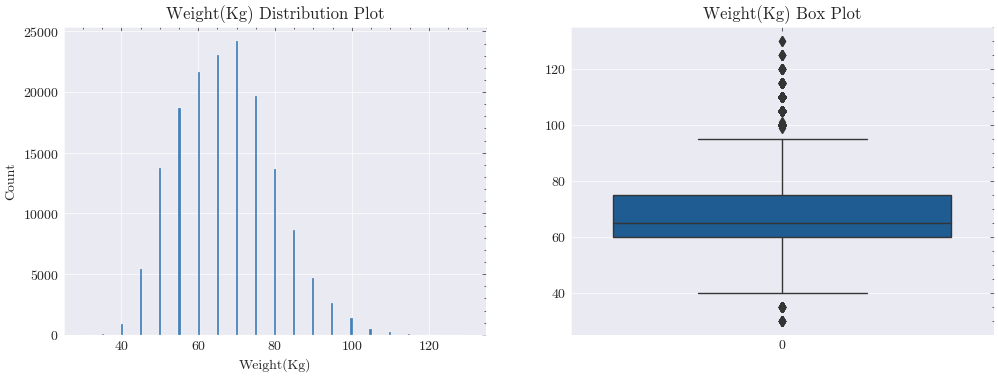

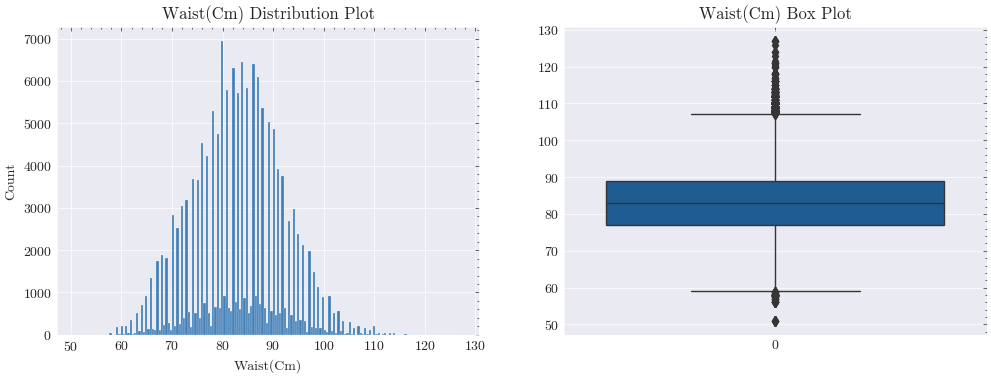

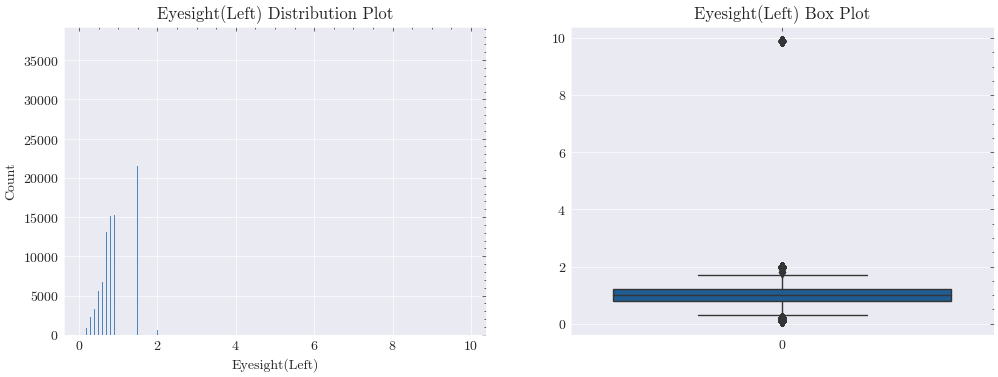

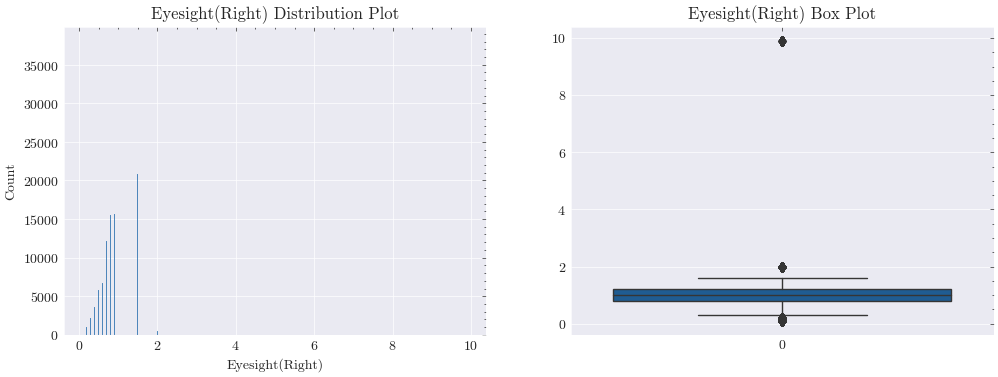

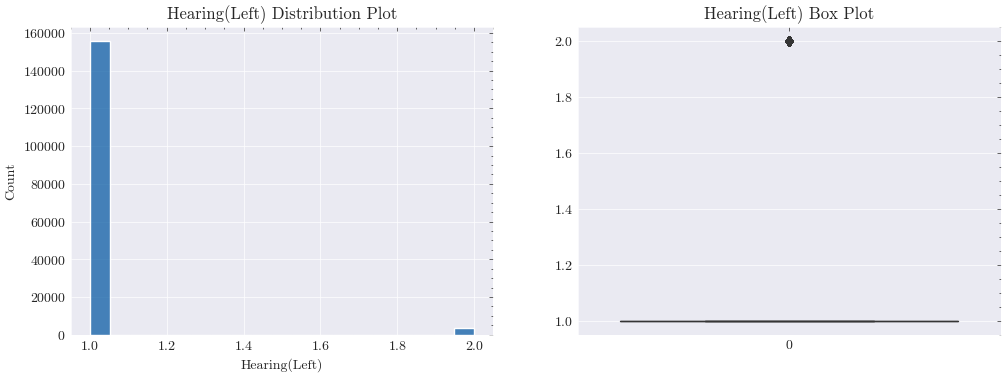

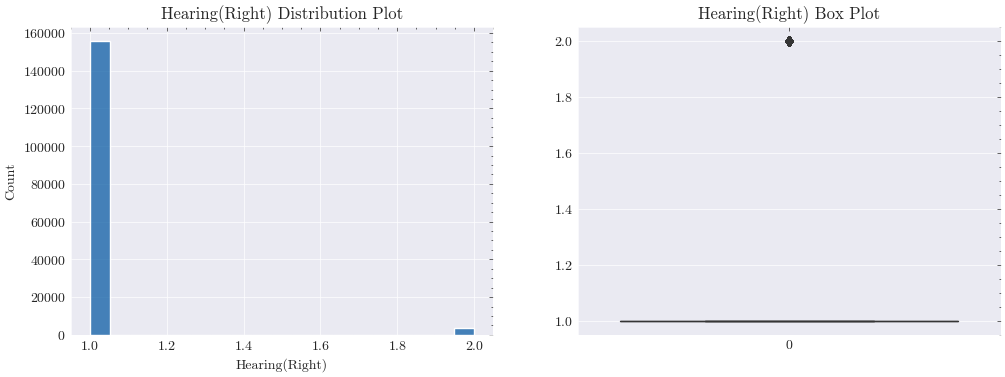

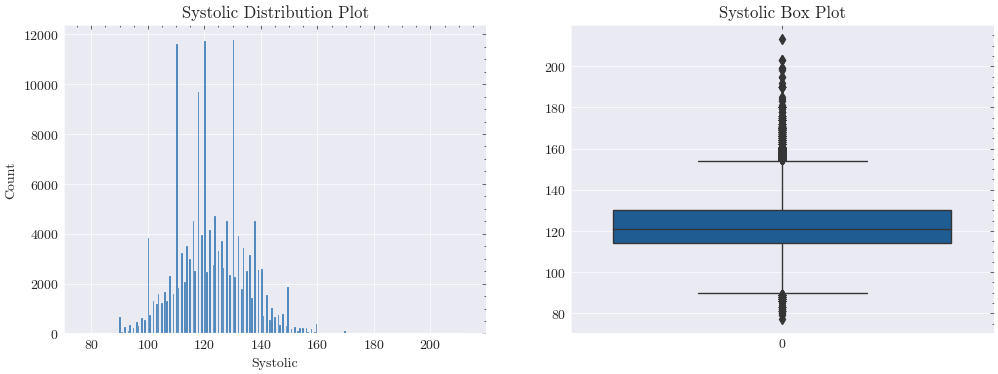

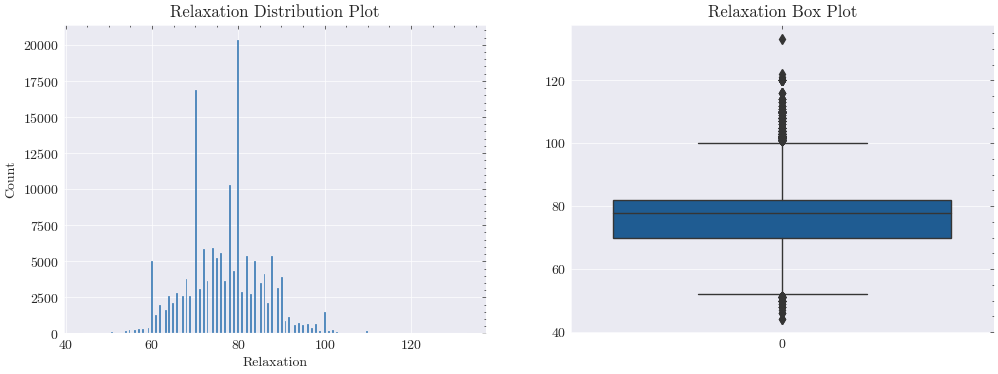

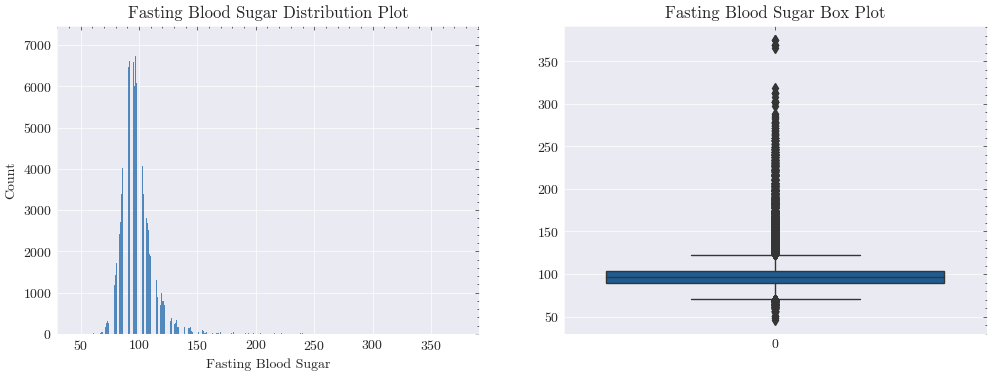

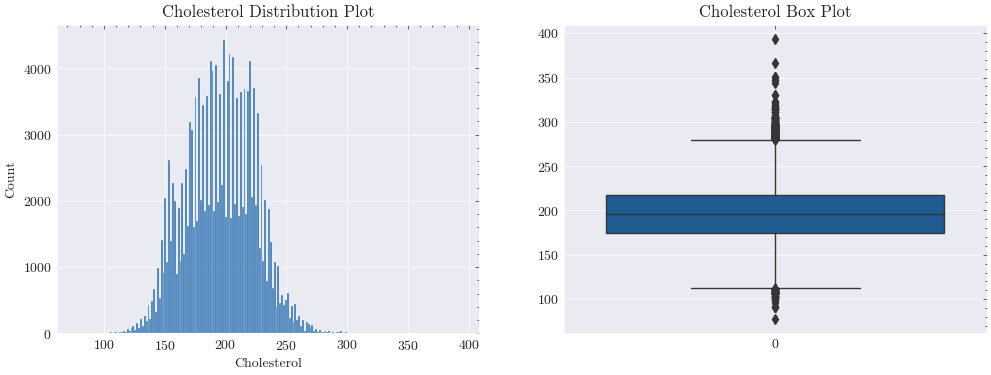

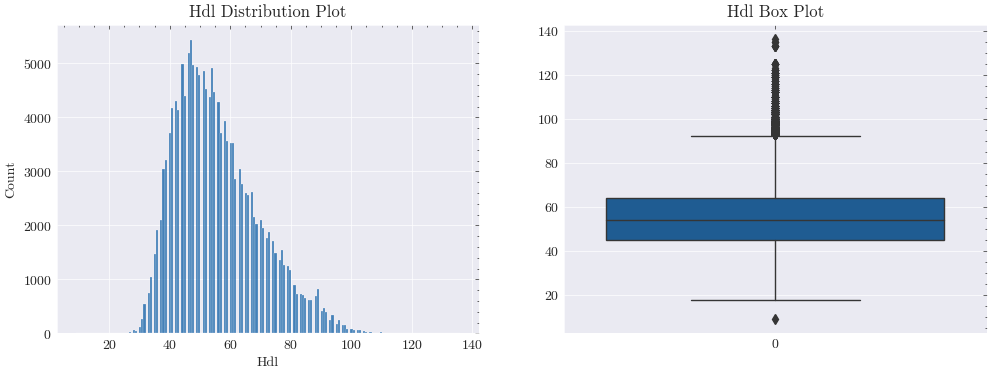

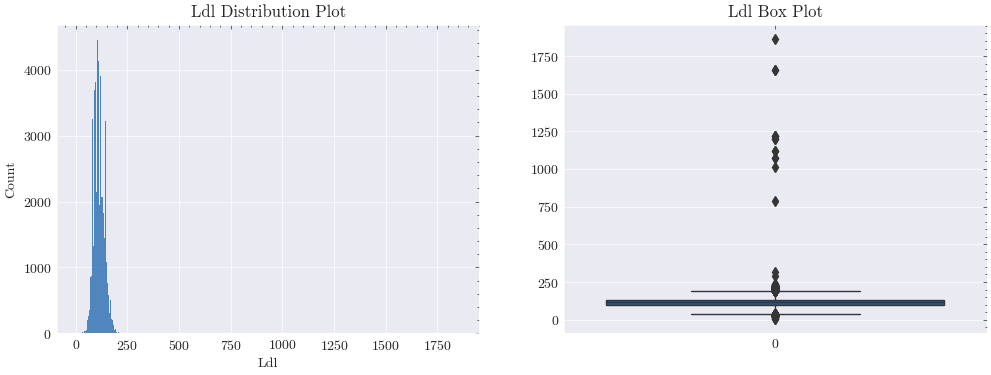

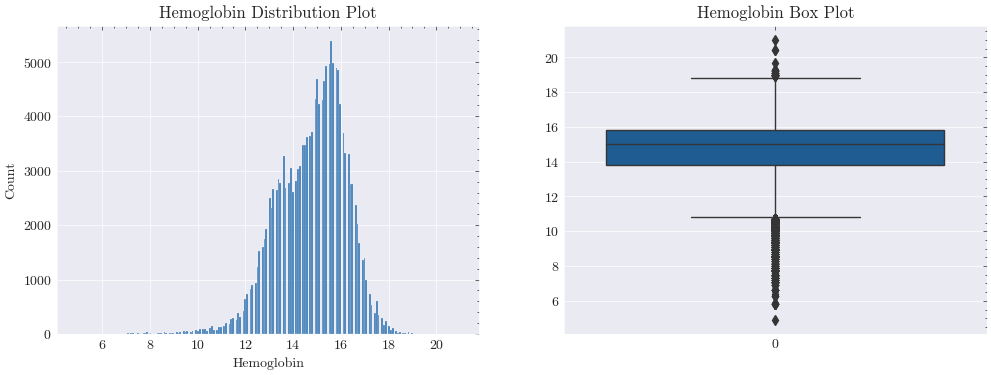

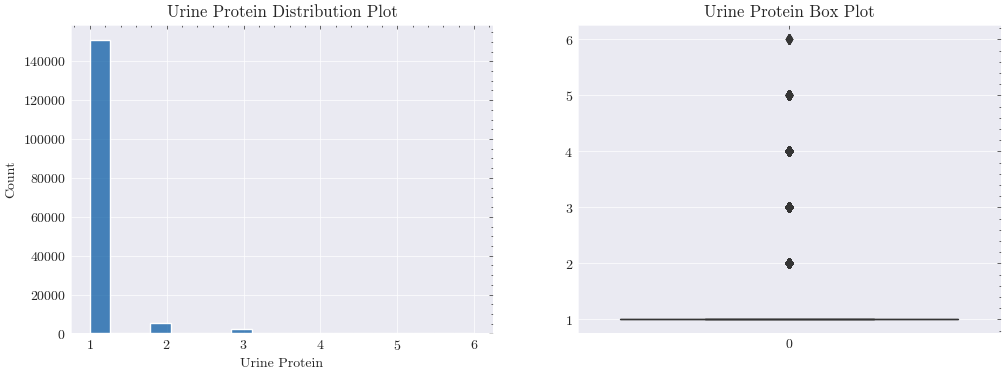

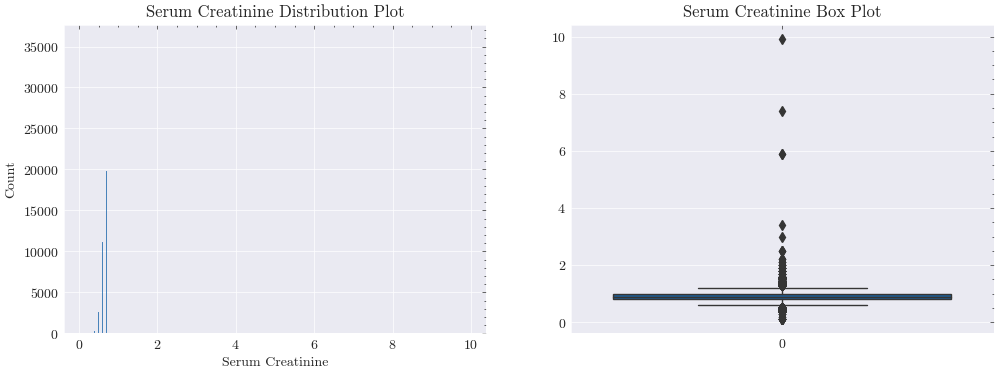

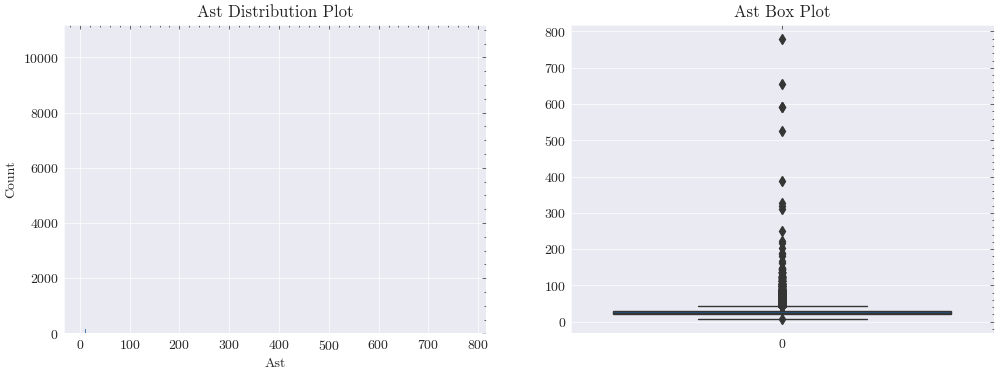

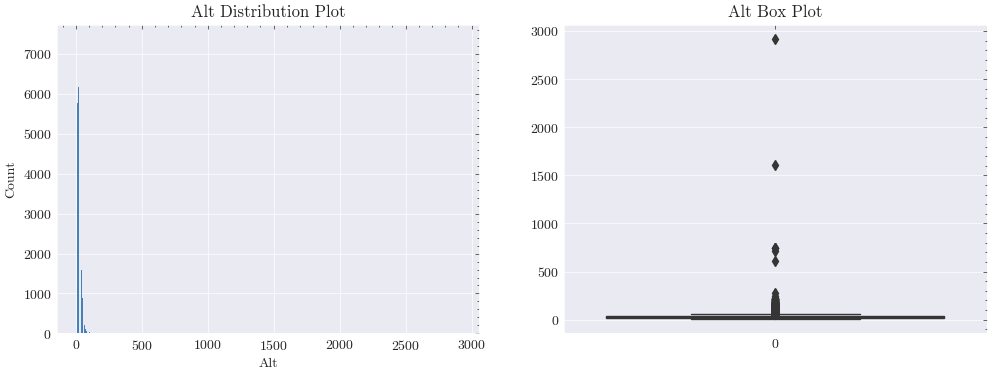

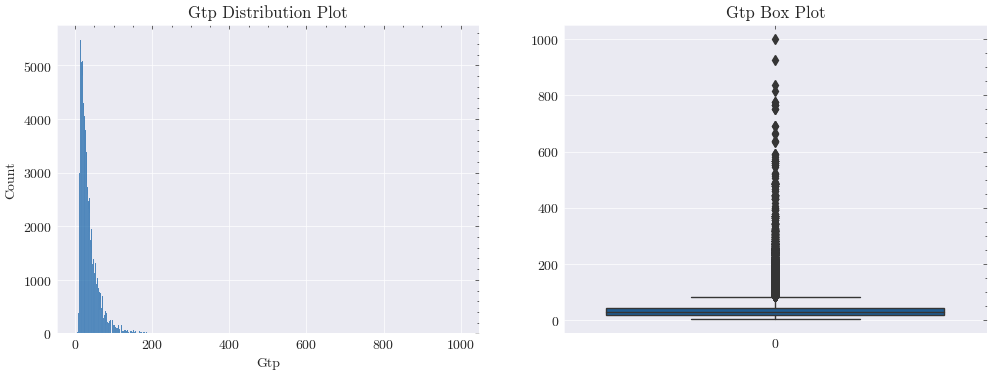

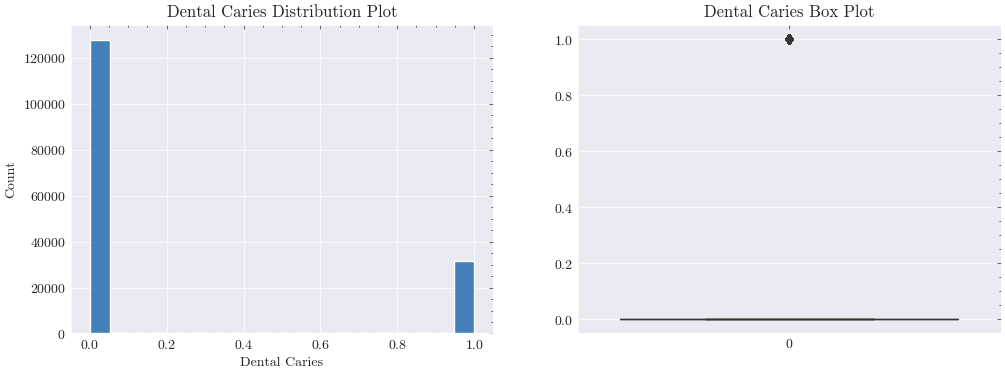

In [15]:
# loop throught all features and make plots

for feat in all_features: 
    #feat = all_features[0]
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    #train[feat].plot(kind='hist',bins=100)
    sns.histplot(train[feat])
    plt.title(f'{feat.title()} Distribution Plot')
    plt.xlabel(f'{feat.title()}')

    plt.subplot(1,2,2)
    sns.boxplot(train[feat])
    plt.title(f'{feat.title()} Box Plot')

    plt.show()

### Takeaways
* Outiler detection is unreliable due to the discrete nature of many of the distributions
    * Ex: age is in 5 year increments (? who does this ?)

In [16]:
# whats up with age in 5 year increments, except a few at 62,69,and 49?
print(train.age.value_counts())

age
40    46691
60    19043
45    18480
50    15768
55    13446
35    13081
30    11465
25     9140
20     3829
65     3637
70     2229
75     1760
80      644
85       38
58        2
62        1
69        1
49        1
Name: count, dtype: int64


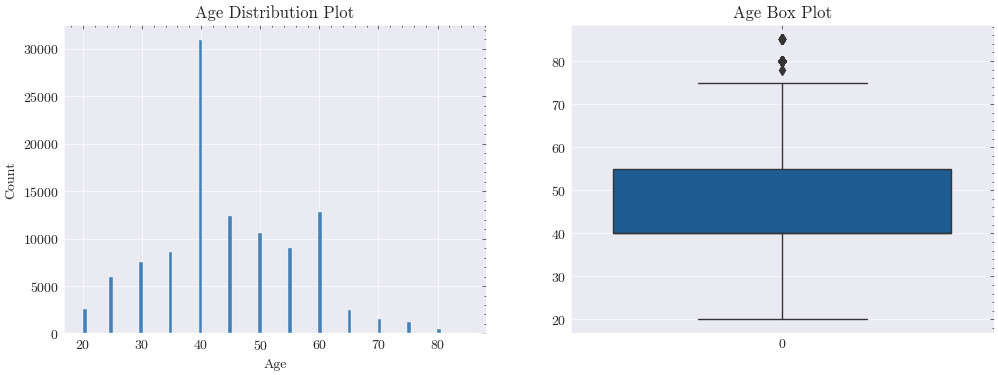

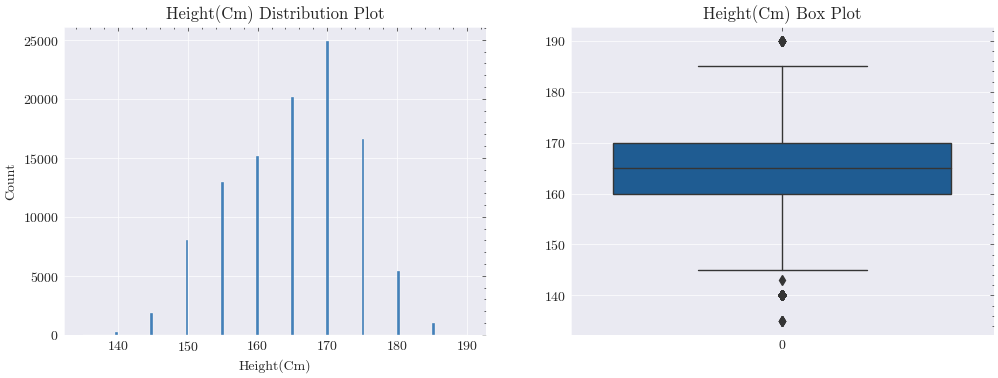

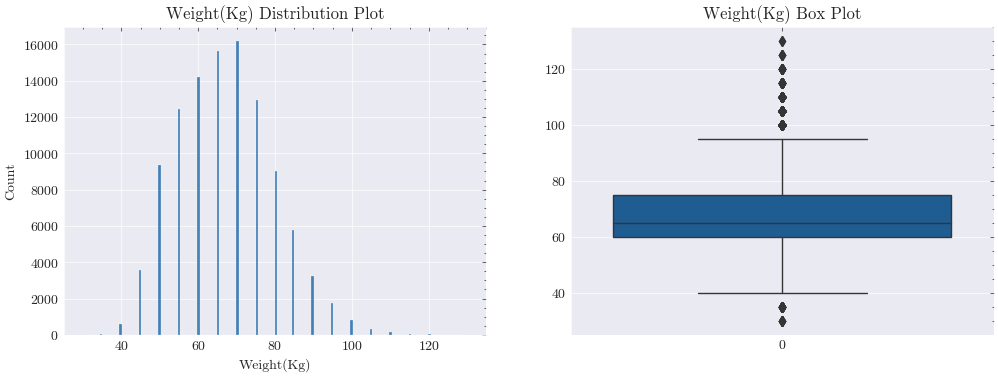

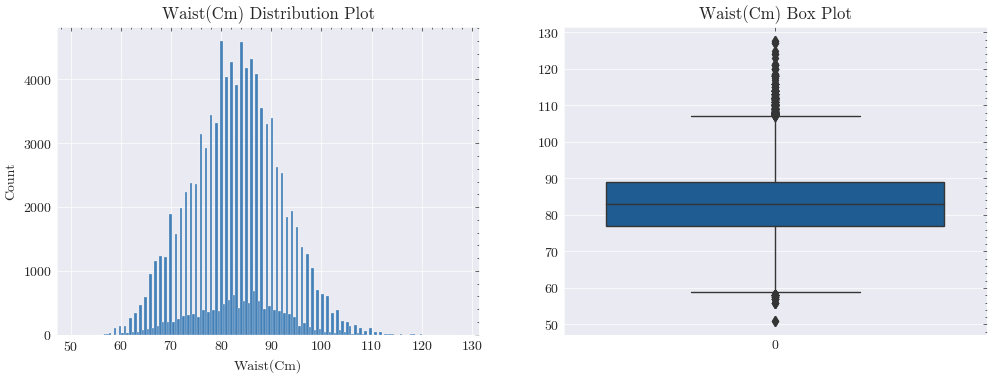

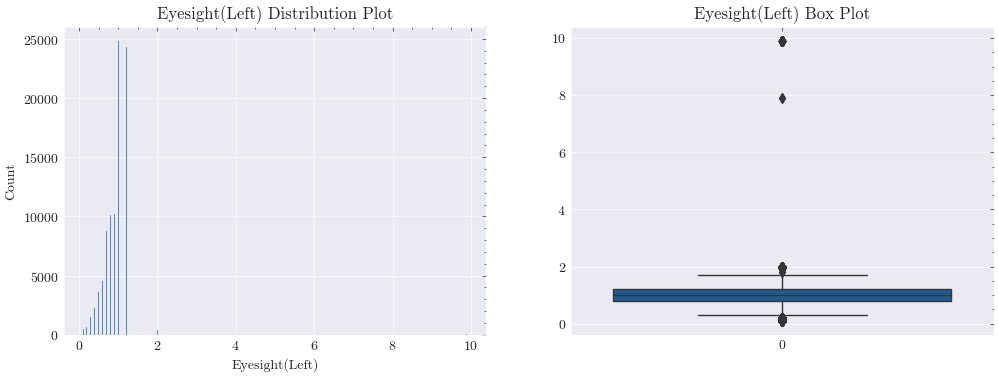

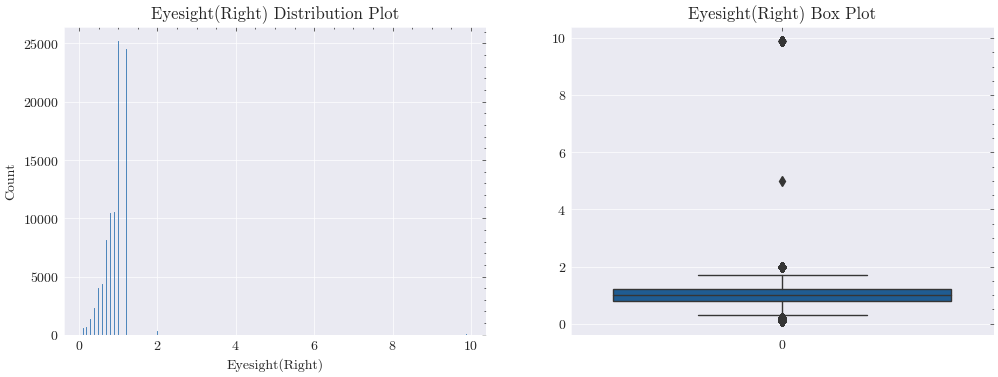

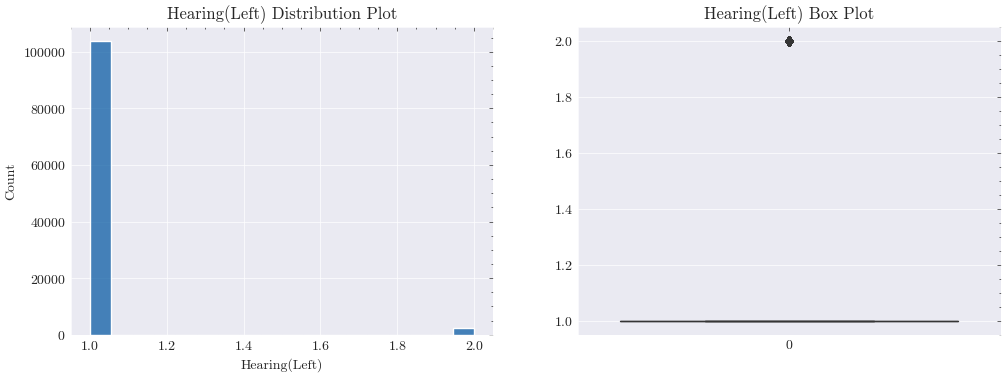

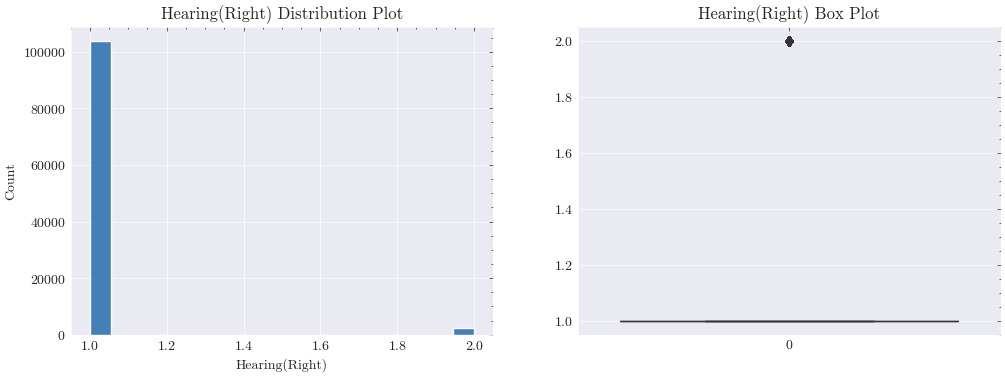

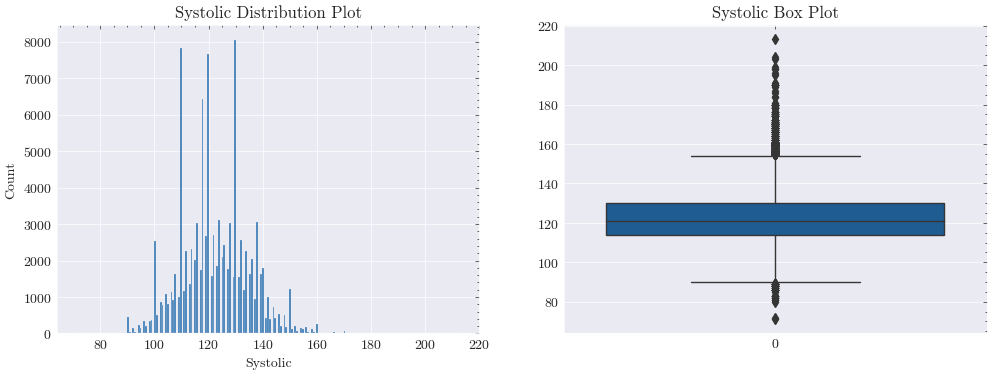

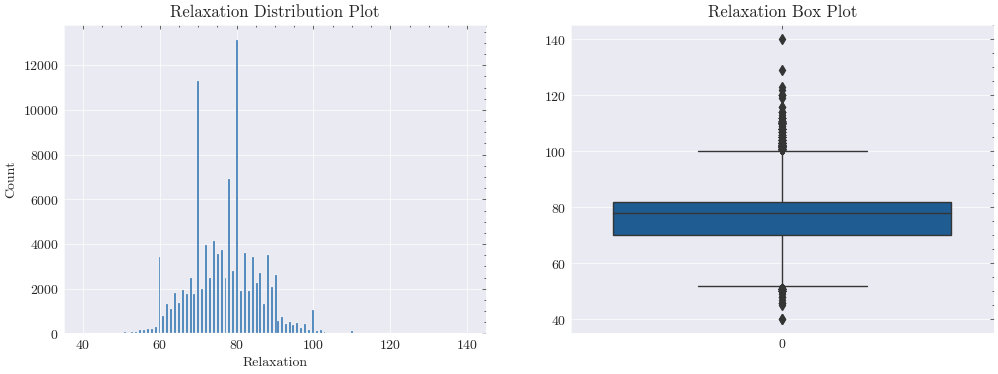

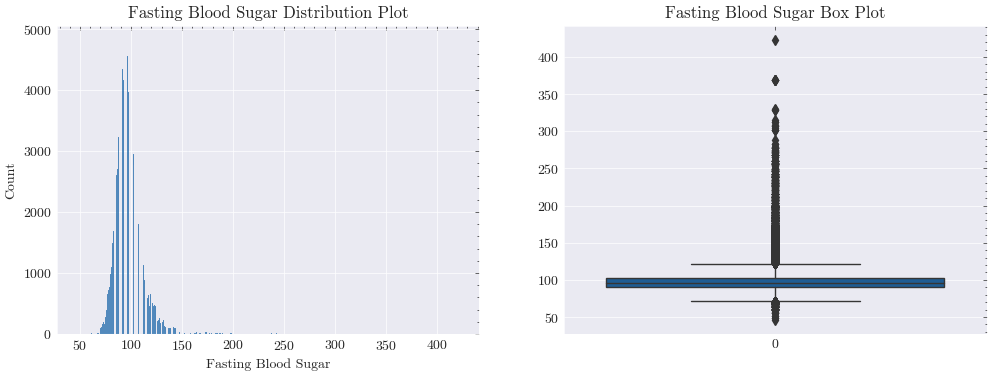

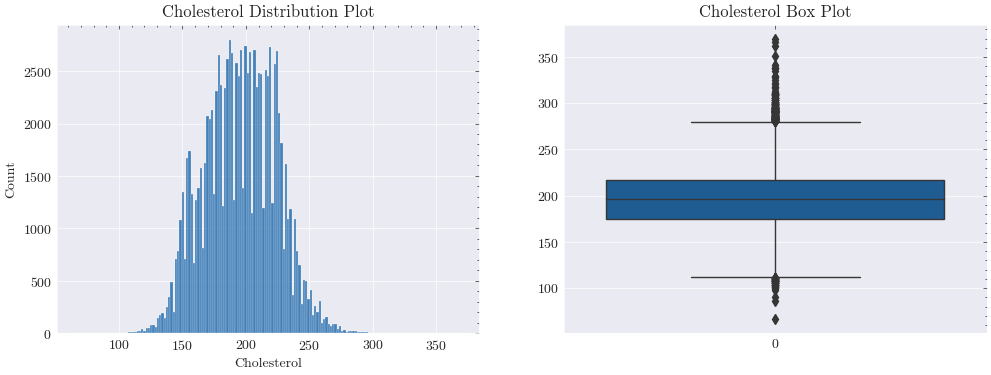

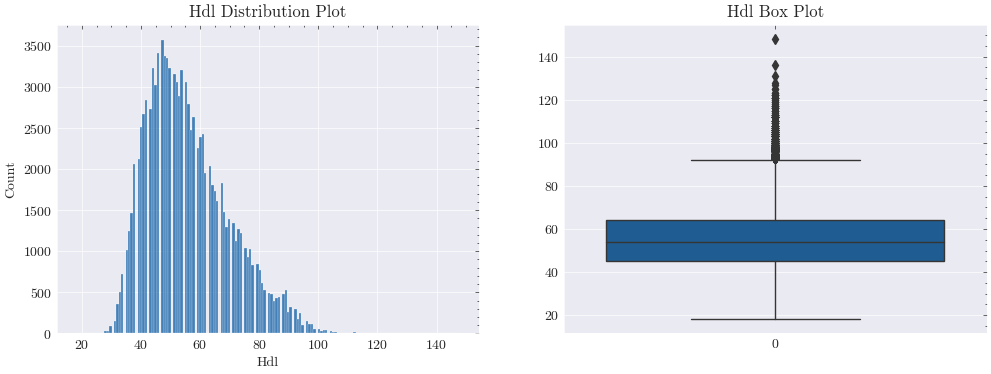

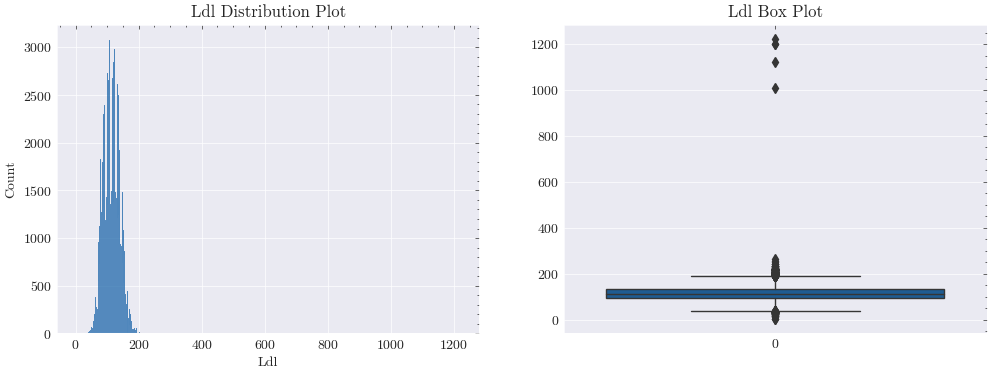

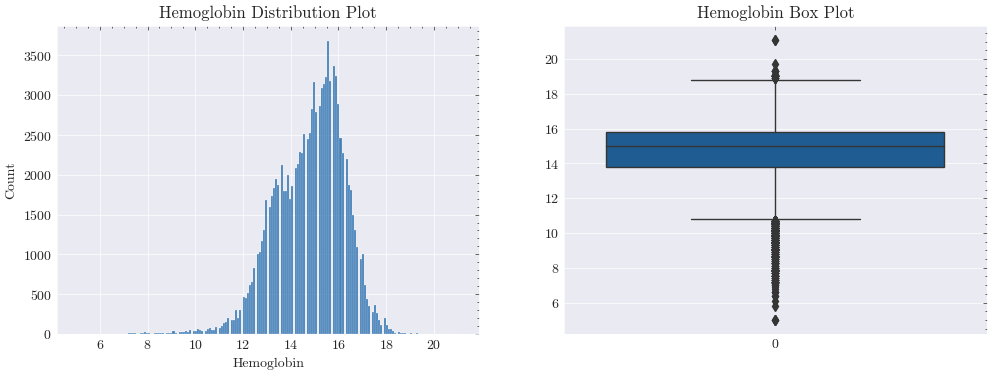

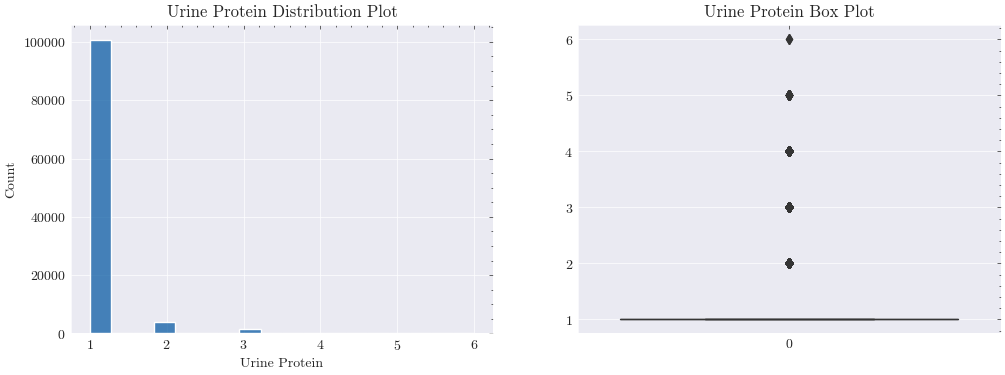

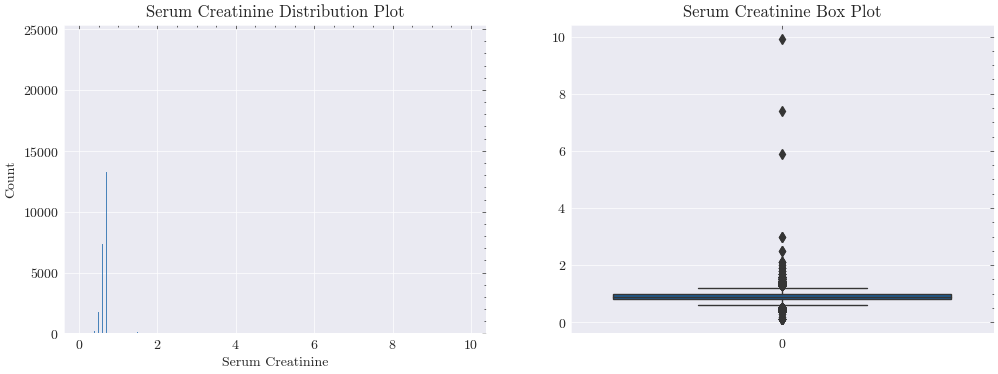

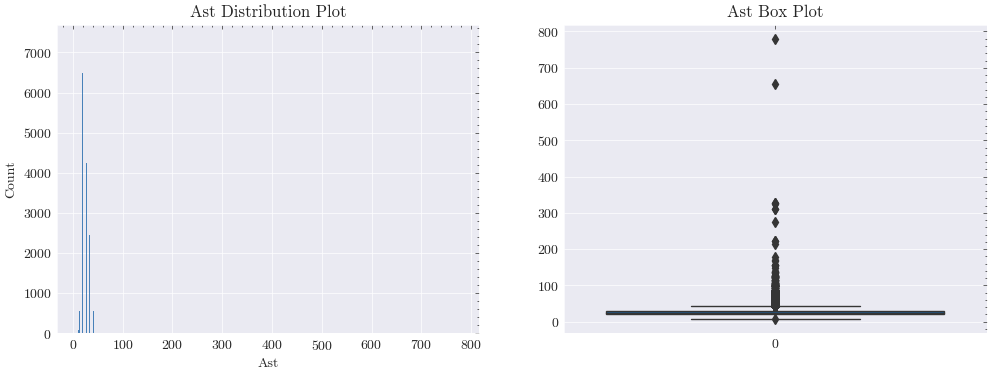

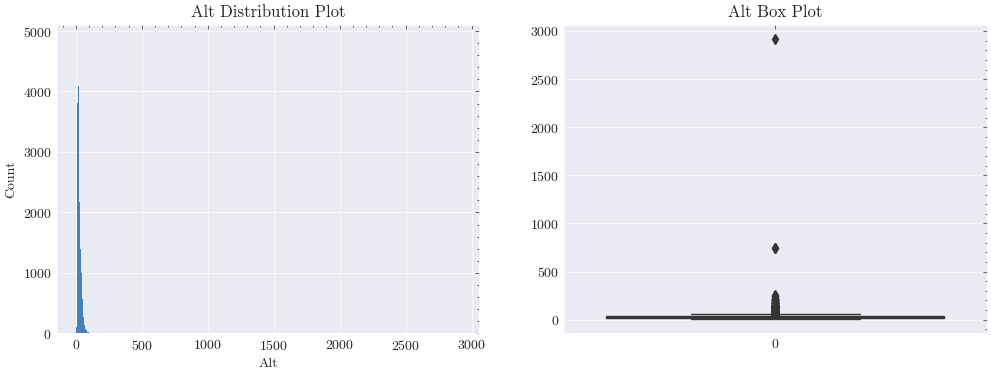

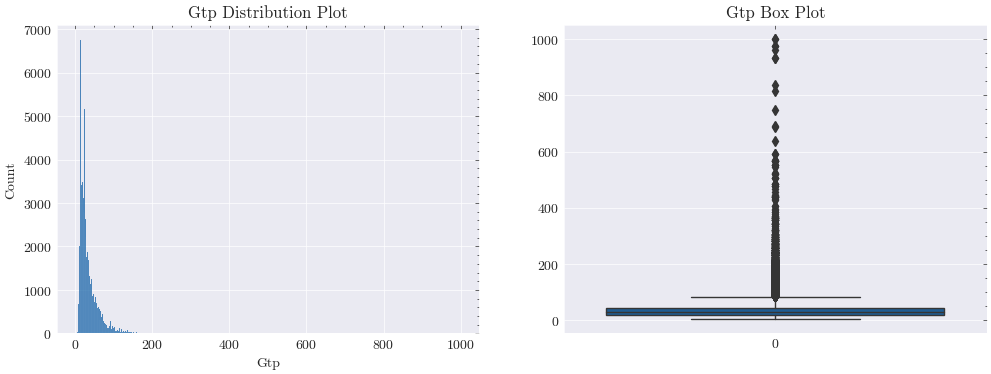

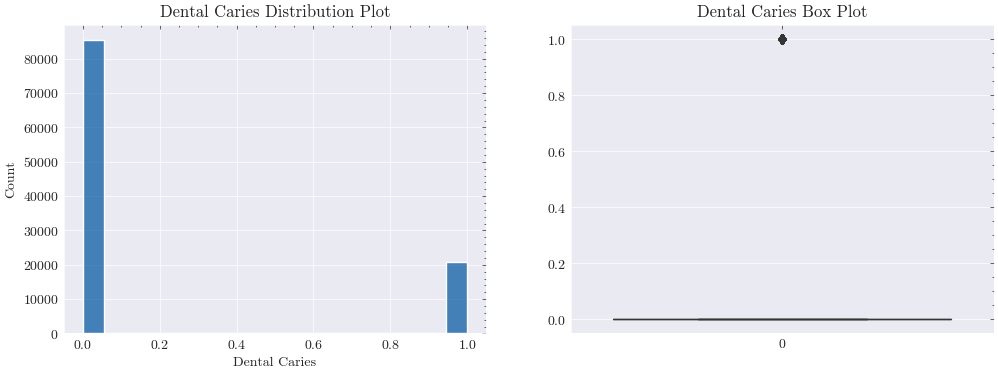

In [17]:
# Now for test data

for feat in all_features: 

    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    #train[feat].plot(kind='hist',bins=100)
    sns.histplot(test[feat])
    plt.title(f'{feat.title()} Distribution Plot')
    plt.xlabel(f'{feat.title()}')

    plt.subplot(1,2,2)
    sns.boxplot(test[feat])
    plt.title(f'{feat.title()} Box Plot')

    plt.show()

### Takeaways
#### Age
* Age is generally in 5 year increments, except for a few, why?
* I think the discrete nature of the data makes the statistics off
* Idea: try to interpolate age based on the other variables (?)

#### Other
* In general, some look like they have outliers that are possibly real, 
* For outliers that look unrealistic, remove or replace with the mean
* Needs more investigation
* Maybe use log transforms on skewed varaibles that seem real

## Target Distribution

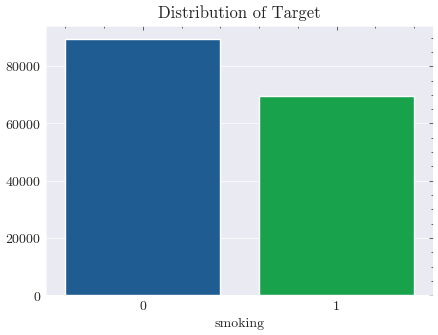

In [18]:
plt.figure(figsize=(5,3.5))
tar_dist = train.smoking.value_counts()
sns.barplot(x=tar_dist.index,y=tar_dist.values)
plt.title('Distribution of Target');

### Takeaway
* Not super imbalanced, but will still use statified kfold.

In [19]:
train.memory_usage().sum()
# train takes about 30MB, decent size, but doesn't need memory management.

30577280